In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读入数据

In [2]:
train = pd.read_json("../../KaggleData/competitions/two-sigma-connect-rental-listing-inquiries/train.json")
test = pd.read_json("../../KaggleData/competitions/two-sigma-connect-rental-listing-inquiries/test.json")

# 观察数据

In [3]:
train.head(3).T

,10,10000,100004
bathrooms,1.5,1,1
bedrooms,3,2,1
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w..."
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo..."
interest_level,medium,low,high
latitude,40.7145,40.7947,40.7388
listing_id,7211212,7150865,6887163


目标属性：interest_level

In [4]:
print('Train dataset info: ')
train.info()  # 查看dataframe数据对象信息
print('\nTest dataset info: ')
test.info()
print('\nShape of Train dataset and test dataset: ')
print(train.shape)
print(test.shape)

Train dataset info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.3+ MB

Test dataset info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 99999
Data columns (total 14 columns):
bathrooms          74659 non-null float64
bedrooms           7

In [5]:
train.isnull().sum()  # 查看是否有缺失值（只能看出非数组对象是否有缺失值）

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [6]:
train.describe()  # 查看数据统计信息

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Text(0.5,1,'Distribution of Price')

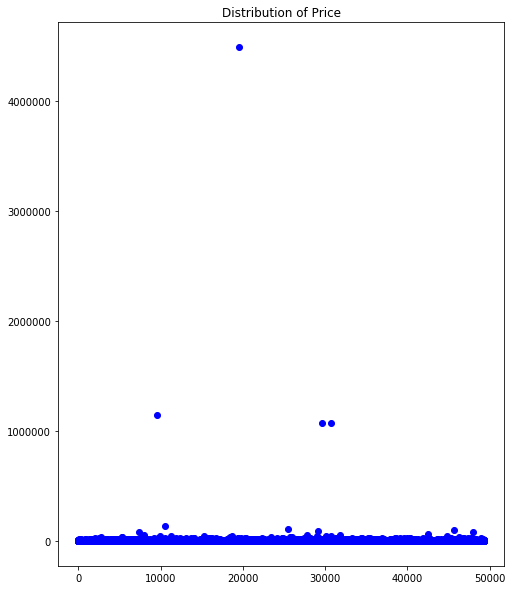

In [7]:
# 查看price属性的分布情况
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train['price'].values, color='blue')
plt.title('Distribution of Price')

c:\program files (x86)\python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,1,'Distribution of Price (After the initial removal of the abnormal point)')

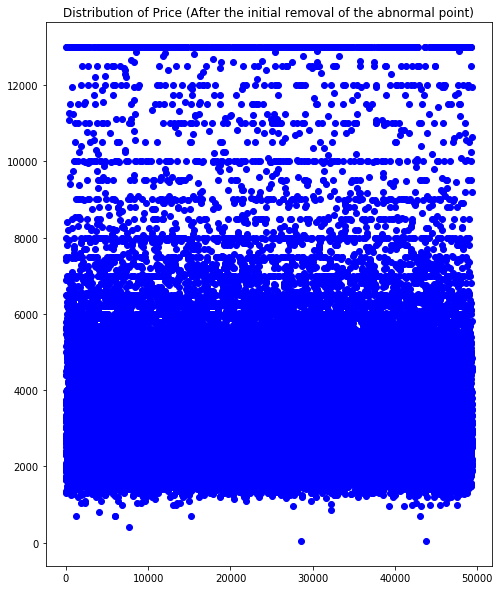

In [8]:
# 处理上图中明显的异常点后，再次查看是否具有其他位于下方的异常点
ulimit = np.percentile(train.price.values, 99)  # 取price中的第99个百分位数
train['price'].iloc[train['price'].values>ulimit] = ulimit
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train['price'].values, color='blue')
plt.title('Distribution of Price (After the initial removal of the abnormal point)')

> 观察数据后得到的几个结论：
> - `building_id`、`listing_id`、`manager_id`属于ID型数据，在本问题中对模型的预测没有太大帮助，可以不采用
> - `display_address`、`street_address`是描述房屋位置的字符型数据，但由于缺乏对当地环境的了解，可利用性不强；而且数据集中已经有了经纬度信息，相比之下经纬度信息更方便处理和利用，因此不采用`display_address`、`street_address`
> - 对于经纬度数据`longitude`和`latitude`，有一个猜想是将其转换为到市中心/商业区的距离，也许会对模型预测做出贡献
> - 其他数据都需要预处理过后才能使用

# 数据预处理
### 1. `created`

In [9]:
# 将时间数据created处理为年、月、日的形式
train['created_year'] = pd.to_datetime(train['created']).dt.year
train['created_month'] = pd.to_datetime(train['created']).dt.month
train['created_day'] = pd.to_datetime(train['created']).dt.day
train[['created', 'created_year', 'created_month', 'created_day']].head()

,created,created_year,created_month,created_day
10,2016-06-24 07:54:24,2016,6,24
10000,2016-06-12 12:19:27,2016,6,12
100004,2016-04-17 03:26:41,2016,4,17
100007,2016-04-18 02:22:02,2016,4,18
100013,2016-04-28 01:32:41,2016,4,28


### 2. `interest_level`

In [10]:
# interest_level是字符串，将其转化成数值，并做One-hot编码，方便后续的特征提取
interest_level_num_map = {'high':0, 'medium':1, 'low':2}
train['label'] = train['interest_level'].apply(lambda x: interest_level_num_map[x])
interest_level = pd.get_dummies(train['interest_level'])
train = pd.concat([train, interest_level], axis=1)
train[['interest_level', 'label', 'high', 'medium', 'low']].head()

,interest_level,label,high,medium,low
10,medium,1,0,1,0
10000,low,2,0,0,1
100004,high,0,1,0,0
100007,low,2,0,0,1
100013,low,2,0,0,1


### 3. 其他数组型数据

In [11]:
# 简单处理，统计其长度
train['num_photos'] = train['photos'].apply(len)
train['num_features'] = train['features'].apply(len)
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['num_description_len'] = train['description'].apply(len)